## Imports

In [15]:
%%time 

import pandas as pd  #
import time
import csv
import numpy as np
from sklearn.model_selection import train_test_split

from sklearn.metrics import accuracy_score
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline



from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import StratifiedKFold


from sklearn.metrics import classification_report
from sklearn.svm import SVC
from tqdm import tqdm
import matplotlib.pyplot as plt  
from time import time
from datetime import datetime
import random
# use seaborn plotting defaults
import seaborn as sns; sns.set()
from sklearn import preprocessing

Wall time: 7.98 ms


## Y data

In [20]:
df_y = pd.read_csv(r'data/eskin_output.csv',header=None)
df_y = pd.DataFrame(df_y)
df_y.columns = ['label']
#df_y.head()
df_y = df_y.replace('poke',1)
df_y = df_y.replace('rub',2)
df_y = df_y.replace('slap',3)
df_y = df_y.replace('stroke',4)
df_y.value_counts()

label
1        1440
2        1440
3        1440
4        1440
dtype: int64

## Input Data

In [21]:
df_stat = pd.read_csv(r'data/eskin_stats.csv',header=None)
df_stat = pd.DataFrame(df_stat)
#df_stat.head()

res_stat = df_stat
stats_col = ['m1','m2','m3','m4','m5','m6','m7','m8','m9','mt',
             'st1','st2','st3','st4','st5','st6','st7','st8','st9','std',
             'va1','va2','va3','va4','va5','va6','va7','va8','va9','var',
             'ma1','ma2','ma3','ma4','ma5','ma6','ma7','ma8','ma9','mad',
             'max1','max2','max3','max4','max5','max6','max7','max8','max9','maxt',
             'min1','min2','min3','min4','min5','min6','min7','min8','min9','mint',
             'ran1','ran2','ran3','ran4','ran5','ran6','ran7','ran8','ran9','rant',
             'sma','e1','e2','e3','e4','e5','e6','e7','e8','e9','et',
             'iq1','iq2','iq3','iq4','iq5','iq6','iq7','iq8','iq9','iqrt']

res_stat.columns = stats_col 

In [22]:
si = pd.read_csv(r'data/eskin_stats_fft.csv',header=None)
si = pd.DataFrame(si)

for t in si.columns:
    #print(si[t].dtypes)
    if si[t].dtypes == 'object':
        #print(si[t])
        si[t] = si[t].str.replace('i','j')
        si[t] = si[t].str.replace(' ','')
        si[t] = si[t].str.replace('\ndtype:complex128','')
        si[t] = si[t].str.replace('\ndtype:float64','')
        si[t] = si[t].str.replace('NaN','')
        si[t] = si[t].str.replace('0-','-')
        si[t] = si[t].str.replace(')','')
        si[t] = si[t].str.replace('(','')
        #print(si[t])
        si[t] = si[t].apply(lambda x: np.complex(x))
        #print(si[t])
res_fft = si

fft_col = ['f_m1','f_m2','f_m3','f_m4','f_m5','f_m6','f_m7','f_m8','f_m9','f_mt',
             'f_st1','f_st2','f_st3','f_st4','f_st5','f_st6','f_st7','f_st8','f_st9','f_std',
             'f_va1','f_va2','f_va3','f_va4','f_va5','f_va6','f_va7','f_va8','f_va9','f_var',
             'f_ma1','f_ma2','f_ma3','f_ma4','f_ma5','f_ma6','f_ma7','f_ma8','f_ma9','f_mad',
             'f_max1','f_max2','f_max3','f_max4','f_max5','f_max6','f_max7','f_max8','f_max9','f_maxt',
             'f_min1','f_min2','f_min3','f_min4','f_min5','f_min6','f_min7','f_min8','f_min9','f_mint',
             'f_ran1','f_ran2','f_ran3','f_ran4','f_ran5','f_ran6','f_ran7','f_ran8','f_ran9','f_rant',
             'f_sma','f_e1','f_e2','f_e3','f_e4','f_e5','f_e6','f_e7','f_e8','f_e9','f_et',
             'f_iq1','f_iq2','f_iq3','f_iq4','f_iq5','f_iq6','f_iq7','f_iq8','f_iq9','f_iqrt']

res_fft.columns = fft_col

res_fft = res_fft.applymap(np.absolute)

In [23]:
data = pd.concat([res_stat,res_fft],axis=1)
data

,m1,m2,m3,m4,m5,m6,m7,m8,m9,mt,...,f_iq1,f_iq2,f_iq3,f_iq4,f_iq5,f_iq6,f_iq7,f_iq8,f_iq9,f_iqrt
0,52.177778,41.044444,44.522222,59.300000,73.244444,60.322222,56.977778,69.855556,55.388889,56.981481,...,441.040214,475.770372,686.422356,562.510183,647.224406,647.224406,562.510183,686.422356,475.770372,590.006178
1,65.988889,68.444444,58.200000,61.166667,70.088889,59.588889,51.922222,45.711111,44.688889,58.422222,...,511.632988,502.491063,542.115355,482.229770,916.884994,916.884994,482.229770,542.115355,502.491063,491.380149
2,52.088889,43.633333,44.533333,83.066667,67.933333,52.477778,52.411111,45.533333,44.933333,54.067901,...,342.123918,528.351686,572.593738,785.070872,634.955719,634.955719,785.070872,572.593738,528.351686,2659.003215
3,76.633333,55.400000,63.288889,154.366667,107.688889,92.022222,102.311111,68.300000,64.022222,87.114815,...,1199.087034,1107.890541,866.829986,842.717586,878.426867,878.426867,842.717586,866.829986,1107.890541,1091.394490
4,41.700000,31.333333,41.577778,44.500000,35.677778,65.966667,79.611111,30.533333,47.644444,46.504938,...,673.920234,1246.701313,595.913625,468.292469,443.726750,443.726750,468.292469,595.913625,1246.701313,484.947378
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5755,48.933333,37.811111,42.133333,85.911111,62.555556,68.033333,105.711111,75.911111,75.444444,66.938272,...,734.803565,603.324825,503.941105,497.120977,789.305868,789.305868,497.120977,503.941105,603.324825,704.721330
5756,60.255556,54.000000,60.911111,87.044444,68.233333,93.477778,52.844444,35.711111,55.366667,63.093827,...,748.469367,810.439308,581.758264,851.872620,838.614857,838.614857,851.872620,581.758264,810.439308,791.359113
5757,48.477778,42.333333,45.600000,44.122222,43.455556,49.155556,48.977778,62.066667,87.233333,52.380247,...,652.898833,796.302439,602.209314,498.463863,610.946722,610.946722,498.463863,602.209314,796.302439,527.242711
5758,148.288889,173.600000,125.600000,185.400000,219.388889,158.655556,122.555556,162.100000,134.788889,158.930864,...,1260.376081,1467.187007,3373.492517,1542.562306,1162.705363,1162.705363,1542.562306,3373.492517,1467.187007,1085.066092


In [24]:
# standardize the data attributes
data = preprocessing.scale(data)

## Trying different versions of SVM using GridSearchCV

In [25]:
# take all our penguin data, and reserve 20% of it for testing 
X_train, X_test, y_train, y_test = train_test_split(data, df_y, test_size=0.3,random_state=42, stratify=df_y)

In [8]:
#tuned_parameters = [{'kernel': ['rbf'], 'gamma': [1e-3, 1e-4],
 #                    'C': [1, 10, 100, 1000]},
  #                  {'kernel': ['linear'], 'C': [1, 10, 100, 1000]}]


In [32]:
# Set the parameters by cross-validation
tuned_parameters = [{'kernel': ['rbf'], 'gamma': [1e-3],
                     'C': [.01,.1, 1, 10, 100, 1000]},
                   {'kernel': ['linear'], 'C': [.01 ,.1 ,1, 10, 100, 1000]}]


scores = ['precision', 'recall']

import warnings
warnings.filterwarnings('ignore') 

In [33]:
%%time 

for score in tqdm(scores):
    print("# Tuning hyper-parameters for %s" % score)
    print()

    clf = GridSearchCV(
        SVC(), tuned_parameters, scoring='%s_macro' % score
    )
    clf.fit(X_train, y_train.values.ravel())

    print("Best parameters set found on development set:")
    print()
    print(clf.best_params_)
    print()
    print("Grid scores on development set:")
    print()
    means = clf.cv_results_['mean_test_score']
    stds = clf.cv_results_['std_test_score']
    for mean, std, params in zip(means, stds, clf.cv_results_['params']):
        print("%0.3f (+/-%0.03f) for %r"
              % (mean, std * 2, params))
    print()

    print("Detailed classification report:")
    print()
    print("The model is trained on the full development set.")
    print("The scores are computed on the full evaluation set.")
    print()
    y_true, y_pred = y_test, clf.predict(X_test)
    print(classification_report(y_true, y_pred))
    print()

# Note the problem is too easy: the hyperparameter plateau is too flat and the
# output model is the same for precision and recall with ties in quality.

  0%|          | 0/2 [00:00<?, ?it/s]

# Tuning hyper-parameters for precision



 50%|█████     | 1/2 [01:24<01:24, 84.85s/it]

Best parameters set found on development set:

{'C': 0.1, 'kernel': 'linear'}

Grid scores on development set:

0.728 (+/-0.291) for {'C': 0.01, 'gamma': 0.001, 'kernel': 'rbf'}
0.935 (+/-0.007) for {'C': 0.1, 'gamma': 0.001, 'kernel': 'rbf'}
0.968 (+/-0.010) for {'C': 1, 'gamma': 0.001, 'kernel': 'rbf'}
0.985 (+/-0.007) for {'C': 10, 'gamma': 0.001, 'kernel': 'rbf'}
0.988 (+/-0.003) for {'C': 100, 'gamma': 0.001, 'kernel': 'rbf'}
0.986 (+/-0.006) for {'C': 1000, 'gamma': 0.001, 'kernel': 'rbf'}
0.976 (+/-0.011) for {'C': 0.01, 'kernel': 'linear'}
0.989 (+/-0.003) for {'C': 0.1, 'kernel': 'linear'}
0.981 (+/-0.005) for {'C': 1, 'kernel': 'linear'}
0.978 (+/-0.008) for {'C': 10, 'kernel': 'linear'}
0.978 (+/-0.008) for {'C': 100, 'kernel': 'linear'}
0.978 (+/-0.008) for {'C': 1000, 'kernel': 'linear'}

Detailed classification report:

The model is trained on the full development set.
The scores are computed on the full evaluation set.

              precision    recall  f1-score   suppo

100%|██████████| 2/2 [02:54<00:00, 87.60s/it]

Best parameters set found on development set:

{'C': 0.1, 'kernel': 'linear'}

Grid scores on development set:

0.736 (+/-0.232) for {'C': 0.01, 'gamma': 0.001, 'kernel': 'rbf'}
0.932 (+/-0.009) for {'C': 0.1, 'gamma': 0.001, 'kernel': 'rbf'}
0.967 (+/-0.010) for {'C': 1, 'gamma': 0.001, 'kernel': 'rbf'}
0.985 (+/-0.007) for {'C': 10, 'gamma': 0.001, 'kernel': 'rbf'}
0.988 (+/-0.003) for {'C': 100, 'gamma': 0.001, 'kernel': 'rbf'}
0.986 (+/-0.007) for {'C': 1000, 'gamma': 0.001, 'kernel': 'rbf'}
0.976 (+/-0.011) for {'C': 0.01, 'kernel': 'linear'}
0.989 (+/-0.003) for {'C': 0.1, 'kernel': 'linear'}
0.981 (+/-0.005) for {'C': 1, 'kernel': 'linear'}
0.978 (+/-0.008) for {'C': 10, 'kernel': 'linear'}
0.978 (+/-0.008) for {'C': 100, 'kernel': 'linear'}
0.978 (+/-0.008) for {'C': 1000, 'kernel': 'linear'}

Detailed classification report:

The model is trained on the full development set.
The scores are computed on the full evaluation set.

              precision    recall  f1-score   suppo

100%|██████████| 2/2 [02:54<00:00, 87.19s/it]

Wall time: 2min 54s


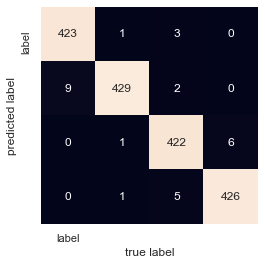

In [34]:
from sklearn.metrics import confusion_matrix
mat = confusion_matrix(y_true, y_pred)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False,
            xticklabels=df_y.columns,
            yticklabels=df_y.columns)
plt.xlabel('true label')
plt.ylabel('predicted label');

In [35]:
print(clf.score(X_train,y_train))
print(clf.score(X_test,y_test))

0.9952876984126985
0.9837962962962964


In [36]:
print(clf.best_params_)

{'C': 0.1, 'kernel': 'linear'}
